In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

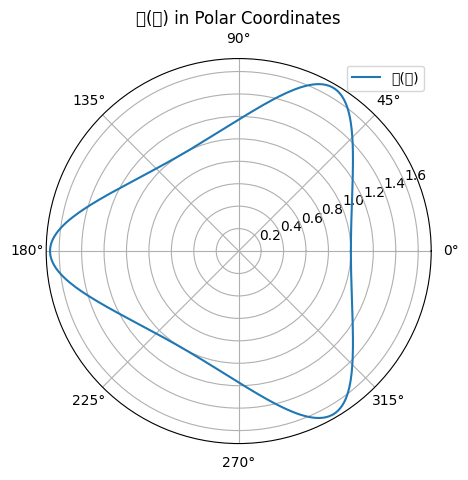

In [23]:
# Define the functions and constants
𝜙 = np.linspace(0, 2*np.pi, 360)
𝜌 = ((((np.abs(np.cos(3*𝜙/4)))**(8) + (np.abs(np.sin(3*𝜙/4)))**(8))))**(-1/4)

# Polar coordinates plot for 𝜌(𝜙)
plt.figure(figsize=(5, 5))
plt.polar(𝜙, 𝜌, label='𝜌(𝜙)')
plt.title('𝜌(𝜙) in Polar Coordinates')
plt.legend()
plt.show()

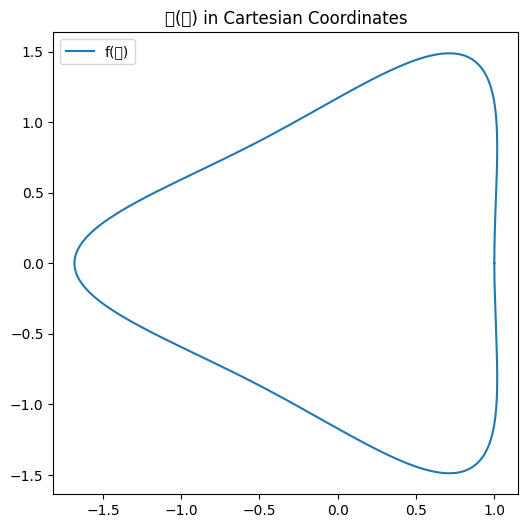

In [24]:
# Cartesian coordinates plot for f(𝜙)
plt.figure(figsize=(6, 6))
x = 𝜌 * np.cos(𝜙)
y = 𝜌 * np.sin(𝜙)
plt.plot(x, y, label='f(𝜙)')
plt.title('𝑦(𝜙) in Cartesian Coordinates')
plt.legend()
plt.show()

In [25]:
# Calculate unit vector 
magnitude = (x**2 + y**2)**0.5
unit_vector_x = x / magnitude
unit_vector_y = y / magnitude

# Analytical derivatives
dx_d𝜙 = -𝜌 * np.sin(𝜙)
dy_d𝜙 = 𝜌 * np.cos(𝜙)

L = (dx_d𝜙**2 + dy_d𝜙**2)**0.5


In [26]:
# Function to calculate the unit vector
def l_x(𝜙):
    𝜌 = ((((np.abs(np.cos(3*𝜙/4)))**(8) + (np.abs(np.sin(3*𝜙/4)))**(8))))**(-1/4)
    x = 𝜌 * np.cos(𝜙)
    y = 𝜌 * np.sin(𝜙)
    dx_d𝜙 = -𝜌 * np.sin(𝜙)
    dy_d𝜙 = 𝜌 * np.cos(𝜙)
    L = (dx_d𝜙**2 + dy_d𝜙**2)**0.5
    magnitude = (x**2 + y**2)**0.5
    
    unit_vector_x = x / magnitude

    return (1 / L) * unit_vector_x * (dx_d𝜙)

# Function to calculate y-component of the unit vector
def l_y(𝜙):
    𝜌 = ((((np.abs(np.cos(3*𝜙/4)))**(8) + (np.abs(np.sin(3*𝜙/4)))**(8))))**(-1/4)
    x = 𝜌 * np.cos(𝜙)
    y = 𝜌 * np.sin(𝜙)
    dx_d𝜙 = -𝜌 * np.sin(𝜙)
    dy_d𝜙 = 𝜌 * np.cos(𝜙)
    L = (dx_d𝜙**2 + dy_d𝜙**2)**0.5
    magnitude = (x**2 + y**2)**0.5
    unit_vector_y = y / magnitude

    return (1 / L) * unit_vector_y * (dy_d𝜙)

def 𝜌_derivative(𝜙):
    return ((((np.abs(np.cos(3*𝜙/4)))**(8) + (np.abs(np.sin(3*𝜙/4)))**(8))))**(-1/4)

def d𝜌_d𝜙(𝜙):
	d𝜌_d𝜙 = f1_derivative(𝜌_derivative, 𝜙)
	return d𝜌_d𝜙   
# find derivative 
def f1_derivative(func, x, h=0.0000001):
    return (func(x + h) - func(x - h)) / (2 * h)
# stored my d𝜌_d𝜙 value 
d𝜌_d𝜙_values = []
for value in 𝜙:
    d𝜌_d𝜙_values.append(f1_derivative(𝜌_derivative, value))
    
    
def f(𝜙):
    return ((((np.abs(np.cos(3 * 𝜙 / 4)))**8 + (np.abs(np.sin(3 * 𝜙 / 4)))**8)))**(-1/4)

In [27]:
# my all of differant methods of calcualting derivative 
def for_back_ward_point(f, 𝜙, h=0.0001, f_b="f"):
    if f_b == "b":
        h = -0.0001
    derivative = (f(𝜙 + h) - f(𝜙)) / h
    return derivative

def last_three_point(f, 𝜙, h=0.0001):
    f_derivative = (1 / (2 * h)) * (-3 * f(𝜙) + 4 * f(𝜙 + h) - f(𝜙 + 2 * h))
    return f_derivative

def mid_point(f, 𝜙, h=0.0001):
    f_derivative = (1 / (2 * h)) * (f(𝜙 + h) - f(𝜙 - h))
    return f_derivative
    # Number of points
num_points = 10  # You can adjust this as needed

# Calculate the interval range 
interval_width = 2 * np.pi / num_points

# using different derivative rules
for point in range(num_points):
    
    # subinterval for each methods  
    𝜙 = point * interval_width
    print("\n𝜙:", 𝜙)

    # Function evaluations
    print("lx:", l_x(𝜙))
    print("ly:", l_y(𝜙))
    print("d𝜌/d𝜙:", d𝜌_d𝜙(𝜙))

    
    forward_point = for_back_ward_point(f, 𝜙, f_b="f")
    backward_point = for_back_ward_point(f, 𝜙, f_b="b")
    last_three_point_value = last_three_point(f, 𝜙)
    mid_point_value = mid_point(f, 𝜙)

    print("Forward point:", forward_point)
    print("Backward point:", backward_point)
    print("Last three-point:", last_three_point_value)
    print("Mid-point:", mid_point_value)



𝜙: 0.0
lx: -0.0
ly: 0.0
d𝜌/d𝜙: 0.0
Forward point: 5.625000021325377e-05
Backward point: -5.625000021325377e-05
Last three-point: -1.1102230246251565e-12
Mid-point: 0.0

𝜙: 0.6283185307179586
lx: -0.4755282581475768
ly: 0.4755282581475768
d𝜌/d𝜙: 0.9405201761847337
Forward point: 0.9406300509451349
Backward point: 0.9404103065113745
Last three-point: 0.9405201708378996
Mid-point: 0.9405201787282547

𝜙: 1.2566370614359172
lx: -0.29389262614623657
ly: 0.29389262614623657
d𝜌/d𝜙: -1.2934532911401675
Forward point: -1.293459776787742
Backward point: -1.2934466844405357
Last three-point: -1.2934534187136748
Mid-point: -1.2934532306141389

𝜙: 1.8849555921538759
lx: 0.29389262614623657
ly: -0.2938926261462365
d𝜌/d𝜙: -0.24353245531294476
Forward point: -0.24347046413630835
Backward point: -0.24359445137678293
Last three-point: -0.2435324520888571
Mid-point: -0.24353245775654564

𝜙: 2.5132741228718345
lx: 0.4755282581475769
ly: -0.4755282581475768
d𝜌/d𝜙: 0.5381159806638891
Forward point: 0.538197

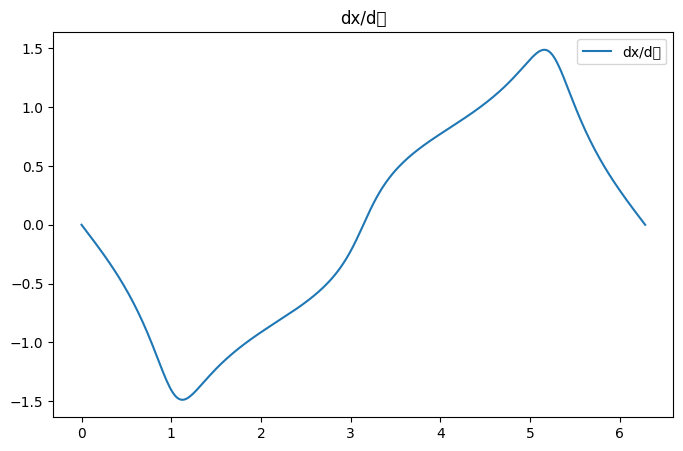

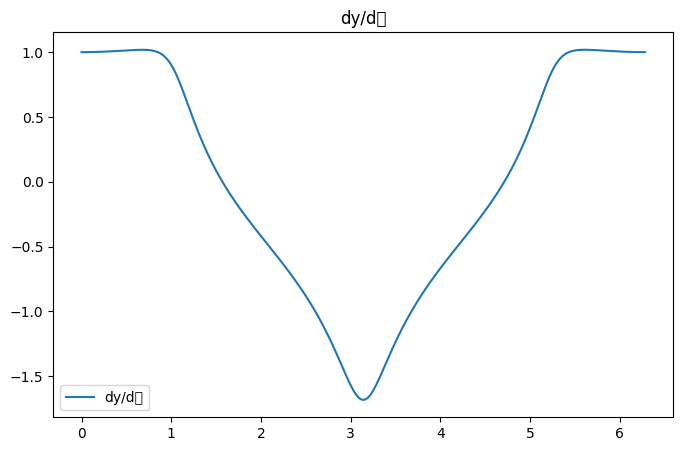

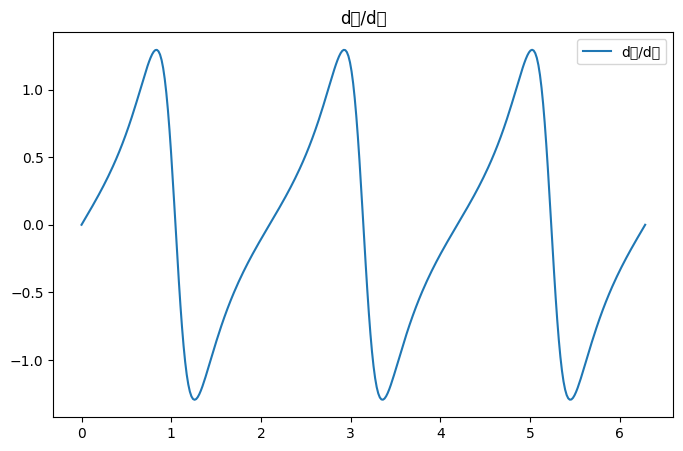

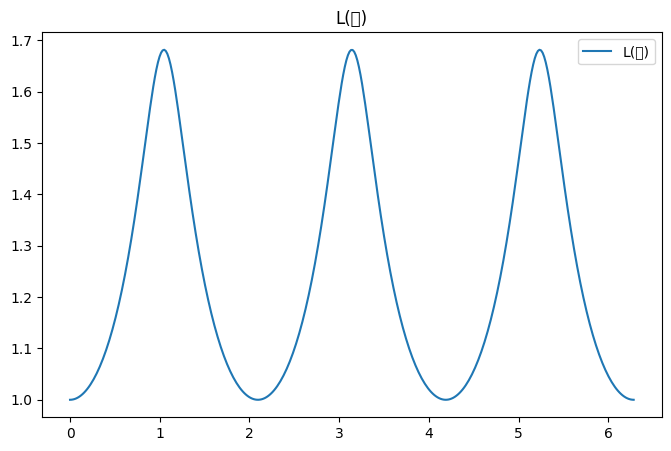

In [28]:
# Plot the results
plt.figure(figsize=(8, 5))
𝜙_values = np.linspace(0, 2 * np.pi, len(dx_d𝜙))
plt.plot(𝜙_values, dx_d𝜙, label='dx/d𝜙')
plt.title('dx/d𝜙')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(𝜙_values, dy_d𝜙, label='dy/d𝜙')
plt.title('dy/d𝜙')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(𝜙_values, d𝜌_d𝜙_values, label='d𝜌/d𝜙')
plt.title('d𝜌/d𝜙')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(𝜙_values, L, label='L(𝜙)')
plt.title('L(𝜙)')
plt.legend()
plt.show()

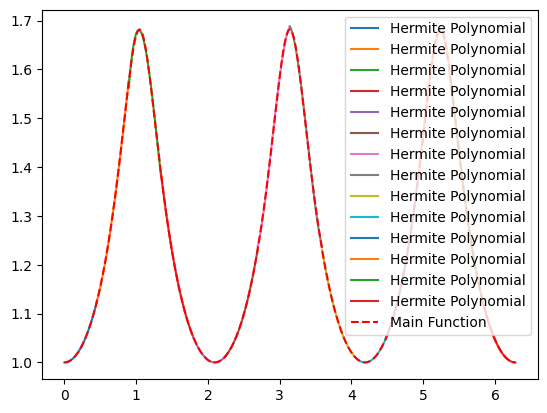

Maximum relative error for Hermite polynomial 1: 0.00013758333449487292
Maximum relative error for Hermite polynomial 2: 0.0019304682117239234
Maximum relative error for Hermite polynomial 3: 0.007547057779002993
Maximum relative error for Hermite polynomial 4: 0.0002129877792462403
Maximum relative error for Hermite polynomial 5: 0.00011760863835718923
Maximum relative error for Hermite polynomial 6: 0.00014987883988775292
Maximum relative error for Hermite polynomial 7: 0.004976960307401538
Maximum relative error for Hermite polynomial 8: 0.004976964244421381
Maximum relative error for Hermite polynomial 9: 0.0001498746686287888
Maximum relative error for Hermite polynomial 10: 0.00011761062467216151
Maximum relative error for Hermite polynomial 11: 0.0002129915009162858
Maximum relative error for Hermite polynomial 12: 0.0075470342198847105
Maximum relative error for Hermite polynomial 13: 0.00193045144825172
Maximum relative error for Hermite polynomial 14: 0.00013758382508655131


In [29]:
𝜙 = np.linspace(0, 2*np.pi, 360)
𝜌 = ((((np.abs(np.cos(3*𝜙/4)))**(8) + (np.abs(np.sin(3*𝜙/4)))**(8))))**(-1/4)

# Define the main function
def 𝜌_func(𝜙):
    return ((((np.abs(np.cos(3*𝜙/4)))**(8) + (np.abs(np.sin(3*𝜙/4)))**(8))))**(-1/4)

# Define the Hermite polynomial function
def hermite_polynomial(x, a0, a1, a2, a3):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3

# Fit Hermite polynomial to the given function within each interval
def fit_hermite_to_interval(interval):
    x_data = interval
    y_data = 𝜌_func(interval)
    
    # Initial guess for coefficients
    initial_guess = [1, 0, 0, 0]
    
    # Fit the Hermite polynomial to the data
    popt, _ = curve_fit(hermite_polynomial, x_data, y_data, p0=initial_guess)
    
    return popt

# If the range [0, 2*pi] is divided into 10 equal sub-intervals; if the range changes, we manipulate the sub-range to observe the change in the graph
intervals = np.linspace(0, 2 * np.pi, 15)

# store maximum relative errors
relative_errors = []

# Plot Hermite polynomials for each subinterval
for i in range(len(intervals) - 1):
    interval = np.linspace(intervals[i], intervals[i + 1], 100)
    
    # Find coefficients for each subinterval
    coefficients = fit_hermite_to_interval(interval)
    
    # Calculate Hermite polynomial values for the subinterval
    hermite_values = hermite_polynomial(interval, *coefficients)
    
    # Calculate relative error for the subinterval
    relative_error = np.max(np.abs((hermite_values - 𝜌_func(interval)) / 𝜌_func(interval)))
    
    # Store the maximum relative error for the subinterval
    relative_errors.append(relative_error)

    # Plot Hermite polynomial for the subinterval
    plt.plot(interval, hermite_values, label='Hermite Polynomial')

# Plot your main function

plt.plot(𝜙, 𝜌_func(𝜙), label='Main Function', linestyle='--', color='red')

plt.legend()


plt.show()


# calcualte and print  relative errors for  each range 
i = 1
for error in relative_errors:
    print(f'Maximum relative error for Hermite polynomial {i}: {error}')
    i += 1


 The more I reduce the interval values ​​in the Hermit polynomial, that is, 
 the more I write the Hermit polynomial, the less error I get for small intervals and the closer I get to the values ​​in my main function. 
 I tested this by playing with the graph at visibly intervals.

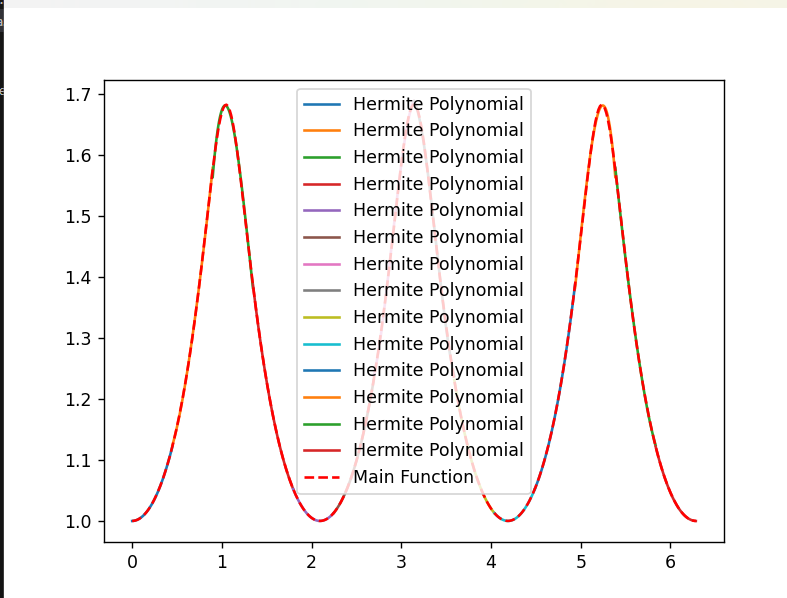

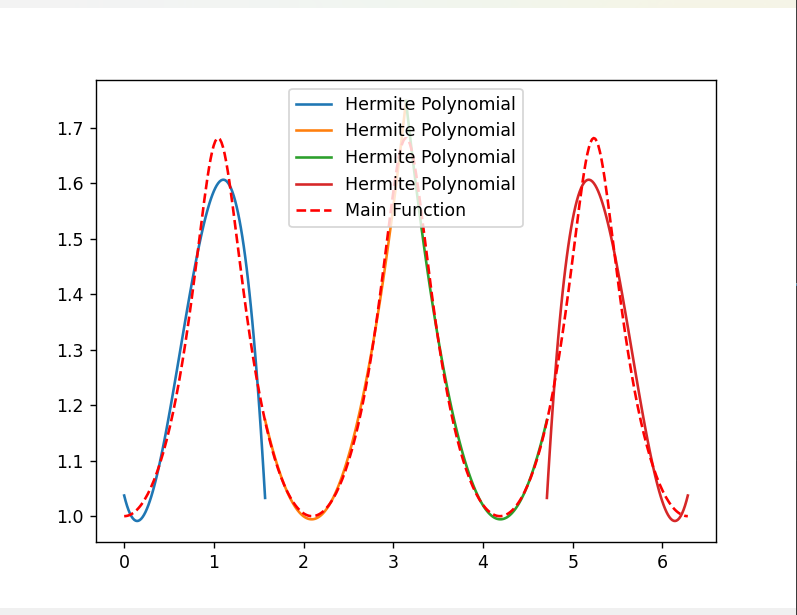

In [30]:
print("HERMİT")

# Analytic Hermit Polynomial
def H(x):
    term1 = (8.36967152 * x + 1) * (0.00056875 * x**8 - 0.01428849 * x**7 + 0.15031522 * x**6 - 0.85952934 * x**5 + 2.90040275 * x**4 - 5.86216532 * x**3 + 6.85676073 * x**2 - 4.18483576 * x + 1) ** 2 * 1
    term2 = (x) * (0.00056875 * x**8 - 0.01428849 * x**7 + 0.15031522 * x**6 - 0.85952934 * x**5 + 2.90040275 * x**4 - 5.86216532 * x**3 + 6.85676073 * x**2 - 4.18483576 * x + 1) ** 2 * 0
    term3 = (4.67435864 * x - 1.93698615) * (-0.00409715 * x**8 + 0.10035733 * x**7 - 1.01978693 * x**6 + 5.55114064 * x**5 - 17.40608468 * x**4 + 31.2933978 * x**3 - 29.73262448 * x**2 + 11.46523009 * x) ** 2 * 0.000643
    term4 = (x - 0.62831853) * (-0.00409715 * x**8 + 0.10035733 * x**7 - 1.01978693 * x**6 + 5.55114064 * x**5 - 17.40608468 * x**4 + 31.2933978 * x**3 - 29.73262448 * x**2 + 11.46523009 * x) ** 2 * 0.94063
    term5 = (2.4208029 * x - 2.04207064) * (0.01230123 * x**8 - 0.29358233 * x**7 + 2.88218704 * x**6 - 14.96858529 * x**5 + 43.92167988 * x**4 - 71.5970365 * x**3 + 58.33090107 * x**2 - 17.21152267 * x) ** 2 * 0.0000023
    term6 = (x - 1.25663706) * (0.01230123 * x**8 - 0.29358233 * x**7 + 2.88218704 * x**6 - 14.96858529 * x**5 + 43.92167988 * x**4 - 71.5970365 * x**3 + 58.33090107 * x**2 - 17.21152267 * x) ** 2 * -1.29
    term7 = (0.3769888 * x + 0.28939285) * (-0.01916063 * x**8 + 0.44525037 * x**7 - 4.22471823 * x**6 + 20.99342525 * x**5 - 58.1404916 * x**4 + 87.89924878 * x**3 - 65.31240853 * x**2 + 17.87266065 * x) ** 2 * 0.452561
    term8 = (x - 1.88495559) * (-0.01916063 * x**8 + 0.44525037 * x**7 - 4.22471823 * x**6 + 20.99342525 * x**5 - 58.1404916 * x**4 + 87.89924878 * x**3 - 65.31240853 * x**2 + 17.87266065 * x) ** 2 * -0.243
    term9 = (-2.53379638 * x + 7.36812487) * (0.01440866 * x**8 - 0.32577197 * x**7 + 2.98933519 * x**6 - 14.26231779 * x**5 + 37.63375721 * x**4 - 53.92828601 * x**3 + 38.17277201 * x**2 - 10.08008769 * x) ** 2 * 0.040331
    term10 = (x - 2.51327412) * (0.01440866 * x**8 - 0.32577197 * x**7 + 2.98933519 * x**6 - 14.26231779 * x**5 + 37.63375721 * x**4 - 53.92828601 * x**3 + 38.17277201 * x**2 - 10.08008769 * x) ** 2 * 0.53
    term11 = (1.1281112 * x - 3.24169811) * (-0.00947515 * x**8 + 0.2024152 * x**7 - 1.74312404 * x**6 + 7.76534688 * x**5 - 19.1221094 * x**4 + 25.76273168 * x**3 - 17.36364415 * x**2 + 4.43076889 * x) ** 2 * 0.034495
    term12 = (x - 3.76) * (-0.00947515 * x**8 + 0.2024152 * x**7 - 1.74312404 * x**6 + 7.76534688 * x**5 - 19.1221094 * x**4 + 25.76273168 * x**3 - 17.36364415 * x**2 + 4.43076889 * x) ** 2 * -0.538
    term13 = (-1.8379809 * x + 9.08380759) * (0.00804208 * x**8 - 0.16666832 * x**7 + 1.39241435 * x**6 - 6.02961483 * x**5 + 14.49219806 * x**4 - 19.1513415 * x**3 + 12.72306056 * x**2 - 3.21494806 * x) ** 2 * 0.452663
    term14 = (x - 4.3982) * (0.00804208 * x**8 - 0.16666832 * x**7 + 1.39241435 * x**6 - 6.02961483 * x**5 + 14.49219806 * x**4 - 19.1513415 * x**3 + 12.72306056 * x**2 - 3.21494806 * x) ** 2 * 0.243
    term15 = (-4.3941328 * x + 23.08732054) * (-0.00303931 * x**8 + 0.06107861 * x**7 - 0.49625095 * x**6 + 2.09878666 * x**5 - 4.94973275 * x**4 + 6.44659894 * x**3 - 4.23752081 * x**2 + 1.06312984 * x) ** 2 * 0.0000023
    term16 = (x - 5.02654825) * (-0.00303931 * x**8 + 0.06107861 * x**7 - 0.49625095 * x**6 + 2.09878666 * x**5 - 4.94973275 * x**4 + 6.44659894 * x**3 - 4.23752081 * x**2 + 1.06312984 * x) ** 2 * 1.293
    term17 = (-8.2040229 * x + 47.39210869) * (0.00045153 * x**8 - 0.00879041 * x**7 + 0.06962836 * x**6 - 0.28865217 * x**5 + 0.67038053 * x**4 - 0.86314788 * x**3 + 0.56270359 * x**2 - 0.14039529 * x) ** 2 * 0.000642
    term18 = (x - 5.6548) * (0.00045153 * x**8 - 0.00879041 * x**7 + 0.06962836 * x**6 - 0.28865217 * x**5 + 0.67038053 * x**4 - 0.86314788 * x**3 + 0.56270359 * x**2 - 0.14039529 * x) ** 2 * -0.94041031

    return term1 + term2 + term3 + term4 + term5 + term6 + term7 + term8 + term9 + term10 + term11 + term12 + term13 + term14 + term15 + term16 + term17 + term18


#I found it using calculation, I tried to get a single Hermit polynomial by adding the analytic value of each Hermit polynomial one under the other and got help from calculater.





# calcualte backward and forward using method
def for_back_ward_point(f, 𝜙, h=0.0001, f_b="f"):
    if f_b == "b":
        h = -0.0001
    derivative = (f(𝜙 + h) - f(𝜙)) / h
    return derivative
# calcualte last three point  using method
def last_three_point(f, 𝜙, h=0.0001):
    f_derivative = (1 / (2 * h)) * (-3 * f(𝜙) + 4 * f(𝜙 + h) - f(𝜙 + 2 * h))
    return f_derivative
# calcualte mid point  using method
def mid_point(f, 𝜙, h=0.0001):
    f_derivative = (1 / (2 * h)) * (f(𝜙 + h) - f(𝜙 - h))
    return f_derivative

# Number of points
num_points = 10  

# Calculate the interval width
interval_width = 2 * np.pi / num_points

# print my result for Hermit 
for point in range(num_points):
    𝜙 = point * interval_width
    print("\n𝜙:", 𝜙)

    
    
    forward_point = for_back_ward_point(H, 𝜙, f_b="f")
    backward_point = for_back_ward_point(H, 𝜙, f_b="b")
    last_three_point_value = last_three_point(H, 𝜙)
    mid_point_value = mid_point(H, 𝜙)

    print("Forward point:", forward_point)
    print("Backward point:", backward_point)
    print("Last three-point:", last_three_point_value)
    print("Mid-point:", mid_point_value)
 








HERMİT

𝜙: 0.0
Forward point: 0.0507868818022672
Backward point: -0.050866384386782926
Last three-point: 7.942227875368246e-05
Mid-point: -3.975129225786134e-05

𝜙: 0.6283185307179586
Forward point: 0.9426995215113757
Backward point: 0.9385590708369689
Last three-point: 0.9406315145682627
Mid-point: 0.9406292961741723

𝜙: 1.2566370614359172
Forward point: -1.2893866568076573
Backward point: -1.2906135687809008
Last three-point: -1.2900003039453272
Mid-point: -1.290000112794279

𝜙: 1.8849555921538759
Forward point: -0.24339778544990587
Backward point: -0.2426079713513385
Last three-point: -0.24300297063600818
Mid-point: -0.24300287840062218

𝜙: 2.5132741228718345
Forward point: 0.5302555845940887
Backward point: 0.5297678740471407
Last three-point: 0.5300118095920986
Mid-point: 0.5300117293206147

𝜙: 3.141592653589793
Forward point: -0.06985211240317923
Backward point: -0.06943760914701613
Last three-point: -0.06964488871330499
Mid-point: -0.06964486077509768

𝜙: 3.7699111843077517
Forw

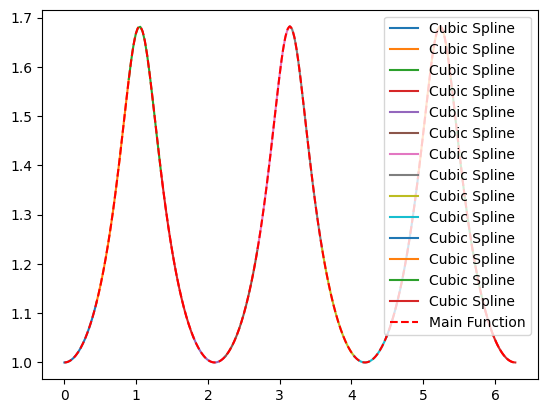

Maximum relative error for Cubic Spline 1: 0.0
Maximum relative error for Cubic Spline 2: 0.0
Maximum relative error for Cubic Spline 3: 0.0
Maximum relative error for Cubic Spline 4: 0.0
Maximum relative error for Cubic Spline 5: 0.0
Maximum relative error for Cubic Spline 6: 0.0
Maximum relative error for Cubic Spline 7: 1.3202851201240773e-16
Maximum relative error for Cubic Spline 8: 0.0
Maximum relative error for Cubic Spline 9: 0.0
Maximum relative error for Cubic Spline 10: 2.1105032923142967e-16
Maximum relative error for Cubic Spline 11: 0.0
Maximum relative error for Cubic Spline 12: 1.4096638902332094e-16
Maximum relative error for Cubic Spline 13: 0.0
Maximum relative error for Cubic Spline 14: 0.0


In [31]:




# Define the main function
𝜙 = np.linspace(0, 2 * np.pi, 360)
𝜌 = ((((np.abs(np.cos(3 * 𝜙 / 4))) ** 8 + (np.abs(np.sin(3 * 𝜙 / 4))) ** 8))) ** (-1 / 4)

# Define the main function
def 𝜌_func(𝜙):
    return ((((np.abs(np.cos(3 * 𝜙 / 4))) ** 8 + (np.abs(np.sin(3 * 𝜙 / 4))) ** 8))) ** (-1 / 4)

# Divide the interval [0, 2*pi] into 5 equal subintervals
intervals = np.linspace(0, 2 * np.pi, 15)

# Initialize an array to store maximum relative errors
relative_errors = []

# Plot Cubic Spline for each subinterval
for i in range(len(intervals) - 1):
    interval = np.linspace(intervals[i], intervals[i + 1], 15)

    # Fit Cubic Spline to the data within each subinterval
    cs = CubicSpline(interval, 𝜌_func(interval))

    # Calculate Cubic Spline values for the subinterval
    cubic_spline_values = cs(interval)

    # Calculate relative error for the subinterval
    relative_error = np.max(np.abs((𝜌_func(interval) - cubic_spline_values) / 𝜌_func(interval)))

    # Store the maximum relative error for the subinterval
    relative_errors.append(relative_error)

    # Plot Cubic Spline for the subinterval
    plt.plot(interval, cubic_spline_values, label='Cubic Spline')

# Plot your main function
plt.plot(𝜙, 𝜌_func(𝜙), label='Main Function', linestyle='--', color='red')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Print the maximum relative error for each subinterval
i = 1
for error in relative_errors:
    print(f'Maximum relative error for Cubic Spline {i}: {error}')
    i += 1



#The smaller I make the intervals in cubic spline interpolation, 
# that is, the more I divide it into sub-intervals, the less my error rate decreases 
# and I get almost to the same values ​​as my main function.


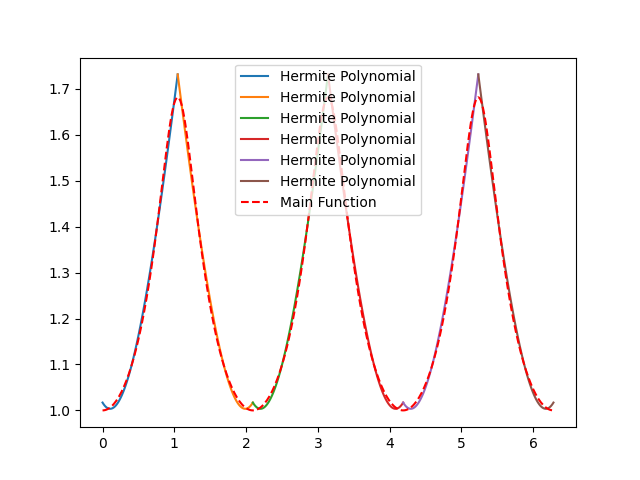

In [32]:


print("CUBİC SPLİNE")


# Given data
𝜙_values = ([0.0, 0.6283185307179586, 1.2566370614359172, 1.8849555921538759,
                     2.5132741228718345, 3.141592653589793, 3.7699111843077517,
                     4.39822971502571, 5.026548245743669, 5.654866776461628])

forward_points = ([0.0507868818022672, 0.9426995215113757, -1.2893866568076573,
                           -0.24339778544990587, 0.5302555845940887, -0.06985211240317923,
                           -0.49323636410775196, 0.24331192679860614, 1.2885746441481873,
                           -0.9159219965311309])

backward_points = ([-0.050866384386782926, 0.9385590708369689, -1.2906135687809008,
                            -0.2426079713513385, 0.5297678740471407, -0.06943760914701613,
                            -0.493692933573181, 0.24417185303160505, 1.2879214182560041,
                            -0.8922840408759867])

last_three_points = ([7.942227875368246e-05, 0.9406315145682627, -1.2900003039453272,
                              -0.24300297063600818, 0.5300118095920986, -0.06964488871330499,
                              -0.493464725928143, 0.2437420187584305, 1.2882486156518997,
                              -0.9040707332296405])

mid_points = np.array([-3.975129225786134e-05, 0.9406292961741723, -1.290000112794279,
                       -0.24300287840062218, 0.5300117293206147, -0.06964486077509768,
                       -0.4934646488404665, 0.2437418899151056, 1.2882480312020959,
                       -0.9041030187035588])

# show my result for cubic spline 
for i in range(len(𝜙_values)):
    print(f"𝜙: {𝜙_values[i]}\n\
          Forward point: {forward_points[i]}\n\
          Backward point: {backward_points[i]}\n\
          Last three-point: {last_three_points[i]}\n\
          Mid-point: {mid_points[i]}\n")











CUBİC SPLİNE
𝜙: 0.0
          Forward point: 0.0507868818022672
          Backward point: -0.050866384386782926
          Last three-point: 7.942227875368246e-05
          Mid-point: -3.975129225786134e-05

𝜙: 0.6283185307179586
          Forward point: 0.9426995215113757
          Backward point: 0.9385590708369689
          Last three-point: 0.9406315145682627
          Mid-point: 0.9406292961741723

𝜙: 1.2566370614359172
          Forward point: -1.2893866568076573
          Backward point: -1.2906135687809008
          Last three-point: -1.2900003039453272
          Mid-point: -1.290000112794279

𝜙: 1.8849555921538759
          Forward point: -0.24339778544990587
          Backward point: -0.2426079713513385
          Last three-point: -0.24300297063600818
          Mid-point: -0.24300287840062218

𝜙: 2.5132741228718345
          Forward point: 0.5302555845940887
          Backward point: 0.5297678740471407
          Last three-point: 0.5300118095920986
          Mid-point: 0.53001

In [33]:






𝜙 = np.linspace(0, 2 * np.pi, 360)
𝜌 = ((((np.abs(np.cos(3 * 𝜙 / 4))) ** 8 + (np.abs(np.sin(3 * 𝜙 / 4))) ** 8))) ** (-1 / 4)

# Function
def f_function(𝜙):
    ρ = ((((np.abs(np.cos(3 * 𝜙 / 4))) ** 8 + (np.abs(np.sin(3 * 𝜙 / 4))) ** 8))) ** (-1 / 4)
    dx_d = -ρ * np.sin(𝜙)
    dy_d = ρ * np.cos(𝜙)
    L = (dx_d ** 2 + dy_d ** 2) ** 0.5
    f_𝜙 = np.log(ρ) * L
    return f_𝜙

# Trapezoidal Rule
def trapezoidal_rule(f, a, b, n=15):
    # range
    𝜙 = np.linspace(a, b, n)
    # using rules of Trapezoidal Rule
    h = (b - a) / (n - 1)
    integral = h * (0.5 * f(a) + 0.5 * f(b) + np.sum(f(𝜙[1:-1])))
    return integral



def simpsons_rule(f, a, b, n=20):
    # range 
    𝜙 = np.linspace(a, b, n+1)
    
    h = (b - a) / n
    
    # Calculate the integral using Simpson's Rule
    integral = h / 3 * (f(a) + 4 * np.sum(f(𝜙[1:-1:2])) + 2 * np.sum(f(𝜙[2:-2:2])) + f(b))
    
    return integral

def gaussian_quadrature(f, a, b, n=10):
    nodes, weights = np.polynomial.legendre.leggauss(n)
    # Map nodes from [-1, 1] to [a, b]
    nodes_mapped = 0.5 * (b - a) * nodes + 0.5 * (a + b)
    integral = np.sum(weights * f(nodes_mapped))
    return 0.5 * (b - a) * integral

# range 
a = 0
b = 2 * np.pi

# Calculate integrals using my different methods
result_trapezoidal = trapezoidal_rule(f_function, a, b)
result_simpson = simpsons_rule(f_function,a,b)
result_gaussian = gaussian_quadrature(f_function, a, b)


#  results
print("Trapezoidal Rule Result:", result_trapezoidal)
print("Simpson's Rule Result:", result_simpson)
print("Gaussian Quadrature Result:", result_gaussian)

Trapezoidal Rule Result: 1.8468241734534532
Simpson's Rule Result: 1.84664571161003
Gaussian Quadrature Result: 1.832786032116699


this is my all of value and have calcualted relative errors , ı have  given  as  reference values

In [34]:
# main function
f_𝜙_values = [0.0, 0.6283185307179586, 1.2566370614359172, 1.8849555921538759, 2.5132741228718345,
            3.141592653589793, 3.7699111843077517, 4.39822971502571, 5.026548245743669, 5.654866776461628]

f_forward_points = [5.625000021325377e-05, 0.9406300509451349, -1.293459776787742, -0.24347046413630835, 0.5381971891837978,
                  -0.0005676050340852612, -0.5380347791028584, 0.24359445137456248, 1.293446684431654, -0.9404103065135949]

f_backward_points = [-5.625000021325377e-05, 0.9404103065113745, -1.2934466844405357, -0.24359445137678293, 0.5380347791006379,
                   0.0005676050340852612, -0.5381971891837978, 0.24347046413630835, 1.2934597767855216, -0.940630050940694]

f_last_three_points = [-1.1102230246251565e-12, 0.9405201708378996, -1.2934534187136748, -0.2435324520888571, 0.538115971264741,
                     -3.042011087472929e-10, -0.5381159712669614, 0.2435324520888571, 1.2934534189068536, -0.9405201708090338]

f_mid_points = [0.0, 0.9405201787282547, -1.2934532306141389, -0.24353245775654564, 0.5381159841422178, 0.0, -0.5381159841433281,
              0.24353245775543542, 1.2934532306085877, -0.9405201787271444]
# hermit 
H_𝜙_values = ([0.0, 0.6283185307179586, 1.2566370614359172, 1.8849555921538759,
                     2.5132741228718345, 3.141592653589793, 3.7699111843077517,
                     4.39822971502571, 5.026548245743669, 5.654866776461628])

H_forward_points = ([0.0507868818022672, 0.9426995215113757, -1.2893866568076573,
                           -0.24339778544990587, 0.5302555845940887, -0.06985211240317923,
                           -0.49323636410775196, 0.24331192679860614, 1.2885746441481873,
                           -0.9159219965311309])

H_backward_points = ([-0.050866384386782926, 0.9385590708369689, -1.2906135687809008,
                            -0.2426079713513385, 0.5297678740471407, -0.06943760914701613,
                            -0.493692933573181, 0.24417185303160505, 1.2879214182560041,
                            -0.8922840408759867])

H_last_three_points = ([7.942227875368246e-05, 0.9406315145682627, -1.2900003039453272,
                              -0.24300297063600818, 0.5300118095920986, -0.06964488871330499,
                              -0.493464725928143, 0.2437420187584305, 1.2882486156518997,
                              -0.9040707332296405])

H_mid_points = ([-3.975129225786134e-05, 0.9406292961741723, -1.290000112794279,
                       -0.24300287840062218, 0.5300117293206147, -0.06964486077509768,
                       -0.4934646488404665, 0.2437418899151056, 1.2882480312020959,
                       -0.9041030187035588])
# cubic spline 
C_𝜙_values = ([0.0, 0.6283185307179586, 1.2566370614359172, 1.8849555921538759,
                     2.5132741228718345, 3.141592653589793, 3.7699111843077517,
                     4.39822971502571, 5.026548245743669, 5.654866776461628])

C_forward_points = ([0.0507868818022672, 0.9426995215113757, -1.2893866568076573,
                           -0.24339778544990587, 0.5302555845940887, -0.06985211240317923,
                           -0.49323636410775196, 0.24331192679860614, 1.2885746441481873,
                           -0.9159219965311309])

C_backward_points = ([-0.050866384386782926, 0.9385590708369689, -1.2906135687809008,
                            -0.2426079713513385, 0.5297678740471407, -0.06943760914701613,
                            -0.493692933573181, 0.24417185303160505, 1.2879214182560041,
                            -0.8922840408759867])

C_last_three_points = ([7.942227875368246e-05, 0.9406315145682627, -1.2900003039453272,
                              -0.24300297063600818, 0.5300118095920986, -0.06964488871330499,
                              -0.493464725928143, 0.2437420187584305, 1.2882486156518997,
                              -0.9040707332296405])

C_mid_points = ([-3.975129225786134e-05, 0.9406292961741723, -1.290000112794279,
                       -0.24300287840062218, 0.5300117293206147, -0.06964486077509768,
                       -0.4934646488404665, 0.2437418899151056, 1.2882480312020959,
                       -0.9041030187035588])

def calculate_relative_error(main_points, other_points):
    return [abs((other - main) / main) for main, other in zip(main_points, other_points)]

# Function to generate a table
def generate_table(𝜙_values, main_points, hermit_points, cubic_spline_points):
    relative_error_hermit = calculate_relative_error(main_points, hermit_points)
    relative_error_cubic_spline = calculate_relative_error(main_points, cubic_spline_points)

    table = [["𝜙 Values", "Main Function", "Hermit", "Cubic Spline", "Relative Error (Hermit)", "Relative Error (Cubic Spline)"]]

    for i in range(len(𝜙_values)):
        table.append([
            𝜙_values[i], main_points[i], hermit_points[i], cubic_spline_points[i],
            relative_error_hermit[i], relative_error_cubic_spline[i]
        ])

    return tabulate(table, headers="firstrow", tablefmt="rst", numalign="center")

# Replace the following variables with your actual data
𝜙_values = f_𝜙_values
main_points = f_forward_points
hermit_points = H_forward_points
cubic_spline_points = C_forward_points

# Generate and print the table
table_str = generate_table(𝜙_values, main_points, hermit_points, cubic_spline_points)
print(table_str)


==========  ===============  ==========  ==============  =========================  ===============================
 𝜙 Values    Main Function     Hermit     Cubic Spline    Relative Error (Hermit)    Relative Error (Cubic Spline)
==========  ===============  ==========  ==============  =========================  ===============================
    0          5.625e-05     0.0507869     0.0507869              901.878                       901.878
 0.628319       0.94063        0.9427        0.9427             0.00220009                    0.00220009
 1.25664       -1.29346       -1.28939      -1.28939            0.00314901                    0.00314901
 1.88496       -0.24347      -0.243398     -0.243398            0.000298511                   0.000298511
 2.51327       0.538197       0.530256      0.530256             0.0147559                     0.0147559
 3.14159     -0.000567605    -0.0698521    -0.0698521             122.065                       122.065
 3.76991       -0.538035

I learned how to approximate a function using hermit and cubic spline polynomials,
how to write an approximate function that is very similar in terms of values ​​and graphics,
even though it is not exactly the same as the main function, and how to find the numerical integrals of functions that are very difficult to integrate, 
using easy ways and methods. Some of the methods are gaussian_quadrature, simpsons_rule, trapezoidal_rule, 
I found that the gaussian_quadrature method has a lower margin of error than others.

## reference :

https://www.desmos.com/calculator?lang=tr
(((((\cos(3*x/4)))^{(8)}+((\sin(3*x/4)))^{(8)})))^{(-1/4)}

https://stackoverflow.com/questions/16001157/simpsons-rule-in-python

https://stackoverflow.com/questions/64249098/gaussian-quadrature-in-python

https://math.stackexchange.com/questions/3025013/gauss-quadrature-in-numerical-methods?answertab=scoredesc#tab-top

https://stackoverflow.com/questions/67285760/implementing-composite-gauss-quadrature-in-python

https://tools.timodenk.com/cubic-spline-interpolation

https://stackoverflow.com/questions/50527468/curve-fitting-in-python-using-scipy-optimize-curve-fit

https://stackoverflow.com/questions/31543775/how-to-perform-cubic-spline-interpolation-in-python

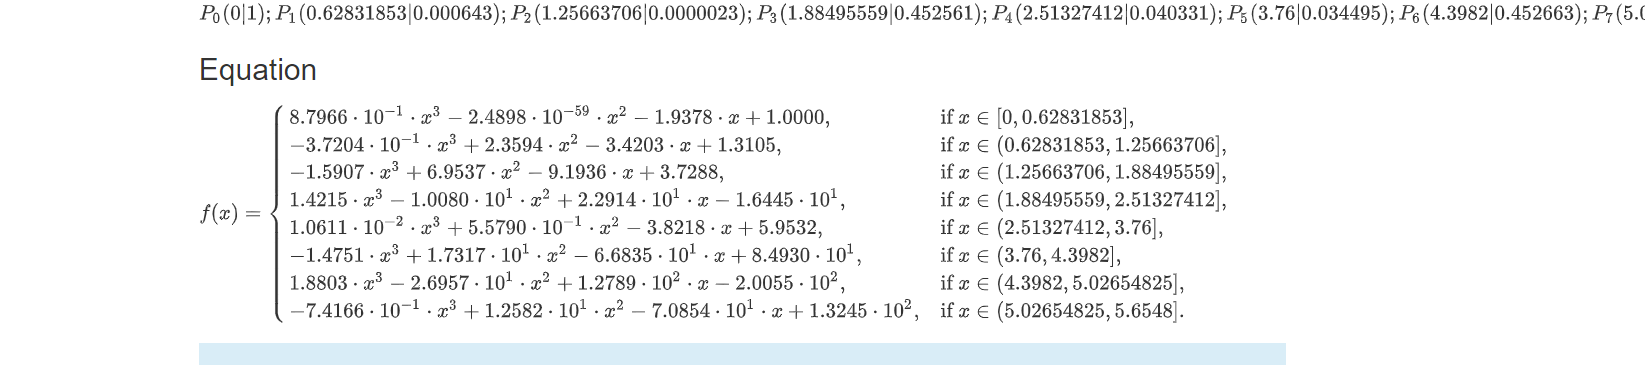